# Import important libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import AUC
from imblearn.over_sampling import ADASYN
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  Dropout, Dense, Input
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4812\848870800.py:66: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# Read Files

In [2]:
# Read Connectome DF
df_connectcome = pd.read_csv("D:/GUC/Semester10/Machine Learning/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
print("df_connectome size:",df_connectcome.shape)


df_connectome size: (1213, 19901)


In [3]:
# Read Categorical DF
df_cat = pd.read_excel("D:/GUC/Semester10/Machine Learning/widsdatathon2025/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx")
print("df_cat size:",df_cat.shape)

df_cat size: (1213, 10)


In [4]:
# Read Quantitative DF
df_quant = pd.read_excel("D:/GUC/Semester10/Machine Learning/widsdatathon2025/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx")
print("df_quant size:",df_quant.shape)

df_quant size: (1213, 19)


In [5]:
# Read Solutions DF
df_solutions = pd.read_excel("D:/GUC/Semester10/Machine Learning/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx")
print("df_solutions size:",df_solutions.shape)

df_solutions size: (1213, 3)


In [6]:
# align the patient records by merging on the "participant ID" on all df (df_cat, df_quant, df_connectcom & df_solutions)
tmp = pd.merge(df_cat, df_quant, on = 'participant_id')
tmp1 = pd.merge(tmp, df_connectcome, on = 'participant_id')
df = pd.merge(tmp1, df_solutions, on = 'participant_id')

In [7]:
# extract df_cat columns and set participant ID as index
df_cat = df.loc[:, 'Basic_Demos_Enroll_Year':'Barratt_Barratt_P2_Occ']
df_cat['participant_id'] = df['participant_id']
df_cat.set_index('participant_id', inplace=True)
df_cat.head()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
participant_id,,,,,,,,,
00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [8]:
# extract df_quant columns and set participant ID as index
df_quant = df.loc[:, 'EHQ_EHQ_Total':'MRI_Track_Age_at_Scan']
df_quant['participant_id'] = df['participant_id']
df_quant.set_index('participant_id', inplace=True)
df_quant.head()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
participant_id,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [9]:
# extract df_connectcome columns and set participant ID as index
df_connectcome = df.loc[:, '0throw_1thcolumn':'198throw_199thcolumn']
df_connectcome['participant_id'] = df['participant_id']
df_connectcome.set_index('participant_id', inplace=True)
df_connectcome.head()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
participant_id,,,,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,0.361339,0.791402,0.530706,0.623133,0.845830,0.680234,0.537144,0.387455,0.498571,0.049068,...,-0.047477,-0.096450,-0.280312,0.037560,0.423037,0.242453,0.336213,0.402338,0.327915,0.539032
00fV0OyyoLfw,0.051430,0.613198,0.635255,0.391237,0.451225,0.600475,0.420935,0.234825,0.322048,0.181864,...,-0.143218,-0.276464,-0.332783,-0.332711,0.556939,0.475578,0.429196,0.457970,0.312571,0.595978
04X1eiS79T4B,-0.305747,0.750316,-0.005342,0.458421,0.757530,0.756288,0.799046,0.622567,0.659165,0.519783,...,-0.133778,-0.108588,-0.002132,-0.175586,0.679183,0.290292,0.486680,0.255208,0.575017,0.605182
05ocQutkURd6,0.450442,0.731530,0.799147,0.701688,0.747468,0.523304,0.575033,0.187189,0.441150,-0.004607,...,-0.096647,-0.041420,-0.199576,-0.216457,0.519074,0.298586,0.415466,0.511607,0.361204,0.446613
06YUNBA9ZRLq,0.415220,0.585700,0.355835,0.664142,0.683491,0.380201,0.375091,0.212314,0.445294,0.226854,...,-0.158995,-0.274017,-0.141012,-0.002865,0.515169,0.336139,0.316430,0.442230,0.177079,0.378278


In [10]:
df_connectcome.columns

Index(['0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn',
       '0throw_4thcolumn', '0throw_5thcolumn', '0throw_6thcolumn',
       '0throw_7thcolumn', '0throw_8thcolumn', '0throw_9thcolumn',
       '0throw_10thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19900)

In [11]:
# extract df_solutions columns and set participant ID as index
df_solutions = df.loc[:, 'ADHD_Outcome':'Sex_F']
df_solutions['participant_id'] = df['participant_id']
df_solutions.set_index('participant_id', inplace=True)
df_solutions.head()

,ADHD_Outcome,Sex_F
participant_id,,
00aIpNTbG5uh,1,0
00fV0OyyoLfw,1,0
04X1eiS79T4B,0,1
05ocQutkURd6,0,1
06YUNBA9ZRLq,1,0


# EDA

In [96]:
df_connectcome.head()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
participant_id,,,,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,0.361339,0.791402,0.530706,0.623133,0.845830,0.680234,0.537144,0.387455,0.498571,0.049068,...,-0.047477,-0.096450,-0.280312,0.037560,0.423037,0.242453,0.336213,0.402338,0.327915,0.539032
00fV0OyyoLfw,0.051430,0.613198,0.635255,0.391237,0.451225,0.600475,0.420935,0.234825,0.322048,0.181864,...,-0.143218,-0.276464,-0.332783,-0.332711,0.556939,0.475578,0.429196,0.457970,0.312571,0.595978
04X1eiS79T4B,-0.305747,0.750316,-0.005342,0.458421,0.757530,0.756288,0.799046,0.622567,0.659165,0.519783,...,-0.133778,-0.108588,-0.002132,-0.175586,0.679183,0.290292,0.486680,0.255208,0.575017,0.605182
05ocQutkURd6,0.450442,0.731530,0.799147,0.701688,0.747468,0.523304,0.575033,0.187189,0.441150,-0.004607,...,-0.096647,-0.041420,-0.199576,-0.216457,0.519074,0.298586,0.415466,0.511607,0.361204,0.446613
06YUNBA9ZRLq,0.415220,0.585700,0.355835,0.664142,0.683491,0.380201,0.375091,0.212314,0.445294,0.226854,...,-0.158995,-0.274017,-0.141012,-0.002865,0.515169,0.336139,0.316430,0.442230,0.177079,0.378278


In [97]:
df_cat.info()
df_cat.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 00aIpNTbG5uh to Zye7yYRQohXi
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Basic_Demos_Enroll_Year           1213 non-null   int64  
 1   Basic_Demos_Study_Site            1213 non-null   int64  
 2   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 3   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 4   MRI_Track_Scan_Location           1210 non-null   float64
 5   Barratt_Barratt_P1_Edu            1198 non-null   float64
 6   Barratt_Barratt_P1_Occ            1182 non-null   float64
 7   Barratt_Barratt_P2_Edu            1015 non-null   float64
 8   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 94.8+ KB


,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
participant_id,,,,,,,,,
00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [17]:
df_quant.info()
df_quant.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 00aIpNTbG5uh to Zye7yYRQohXi
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EHQ_EHQ_Total               1200 non-null   float64
 1   ColorVision_CV_Score        1190 non-null   float64
 2   APQ_P_APQ_P_CP              1201 non-null   float64
 3   APQ_P_APQ_P_ID              1201 non-null   float64
 4   APQ_P_APQ_P_INV             1201 non-null   float64
 5   APQ_P_APQ_P_OPD             1201 non-null   float64
 6   APQ_P_APQ_P_PM              1201 non-null   float64
 7   APQ_P_APQ_P_PP              1201 non-null   float64
 8   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 9   SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 10  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 11  SDQ_SDQ_Externalizing       1204 non-null   float64
 12  SDQ_SDQ_Generating_Impact   1204 non-null   float64
 13  SDQ_SDQ_Hyperactivi

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
participant_id,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [18]:
df_solutions.head()

,ADHD_Outcome,Sex_F
participant_id,,
00aIpNTbG5uh,1,0
00fV0OyyoLfw,1,0
04X1eiS79T4B,0,1
05ocQutkURd6,0,1
06YUNBA9ZRLq,1,0


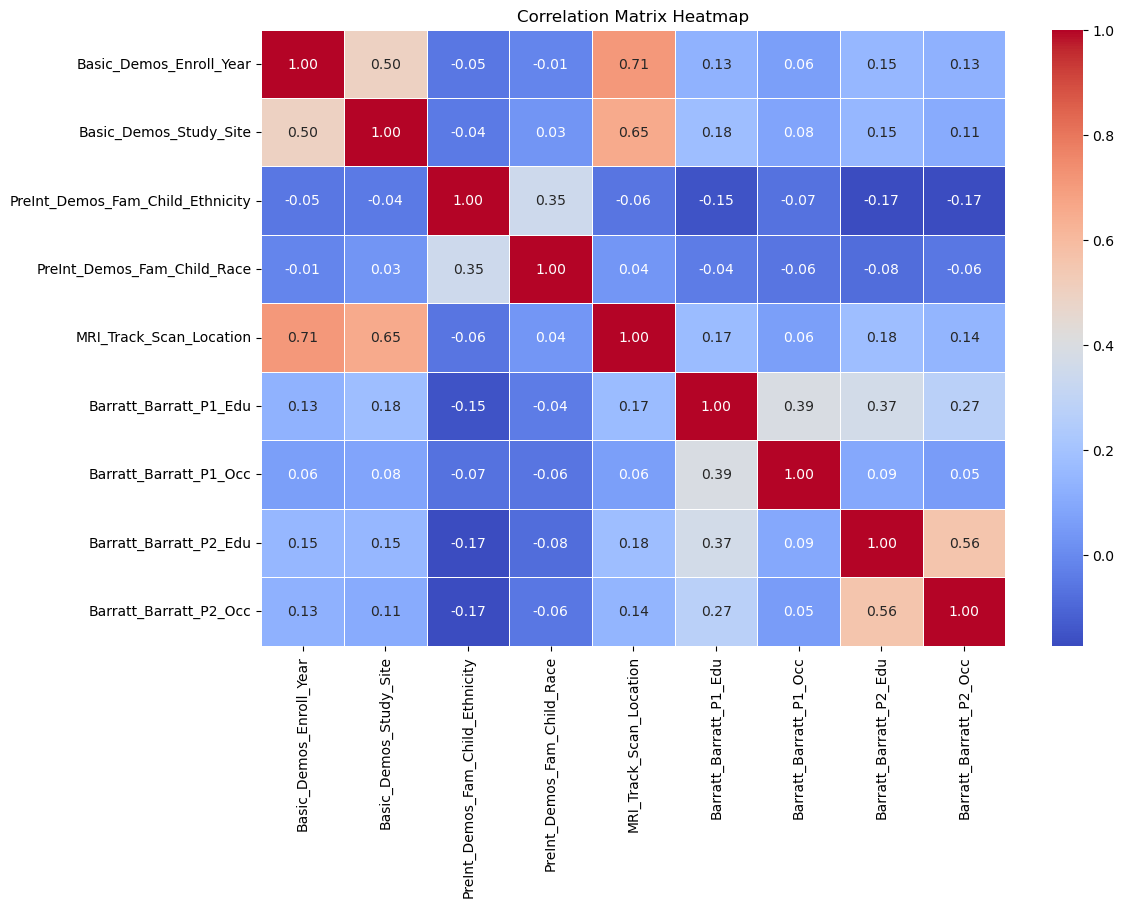

In [19]:
# correlation matrix for categorical data
correlation_matrix_cat = df_cat.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

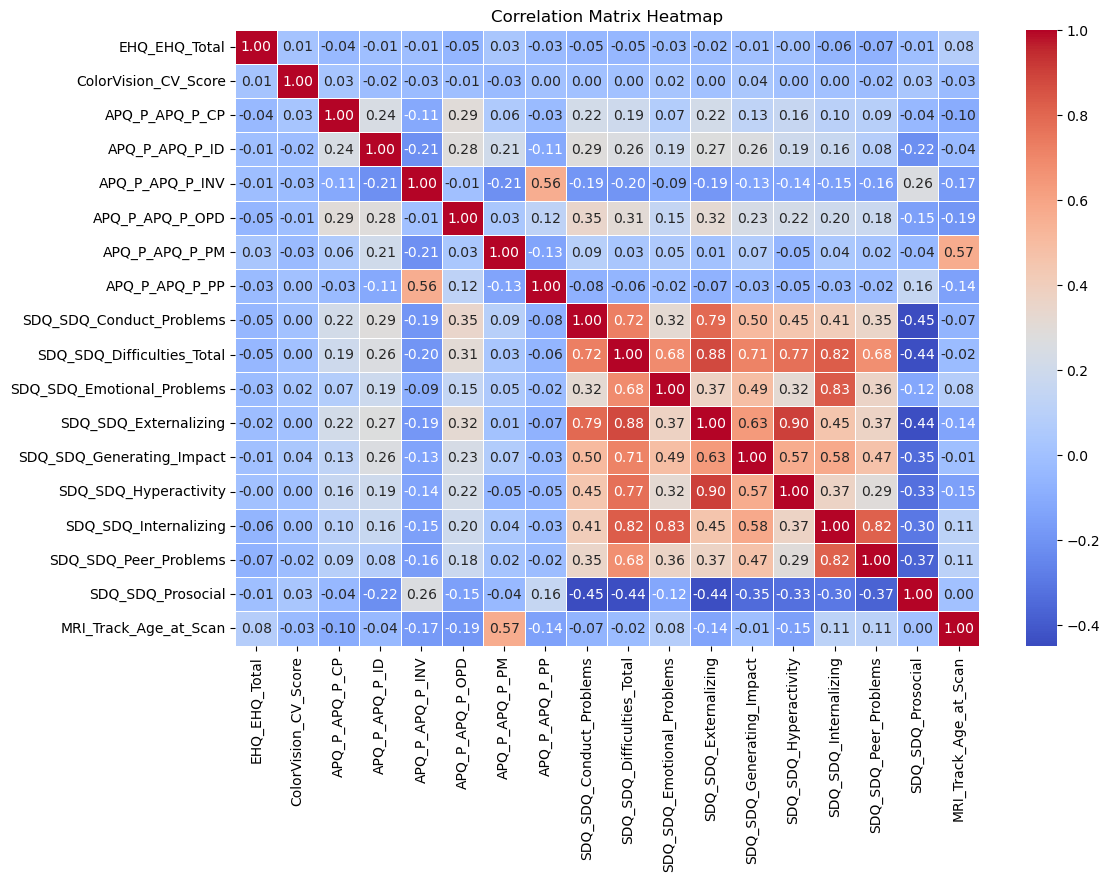

In [20]:
# correlation matrix for quantitative data
correlation_matrix_quant = df_quant.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_quant, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

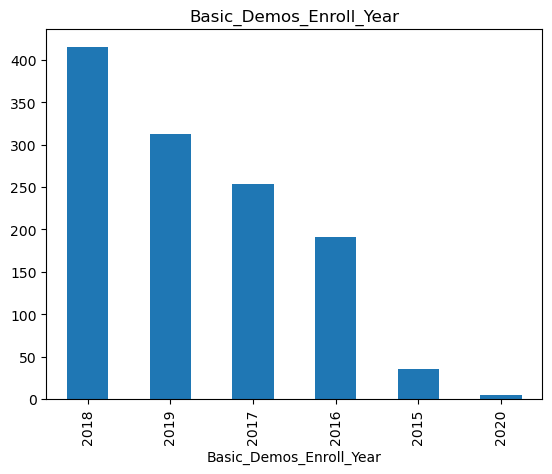

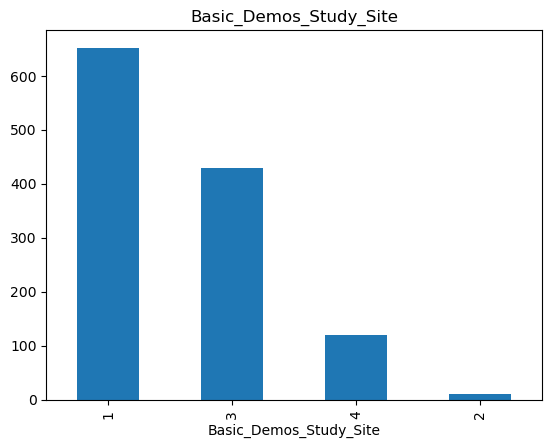

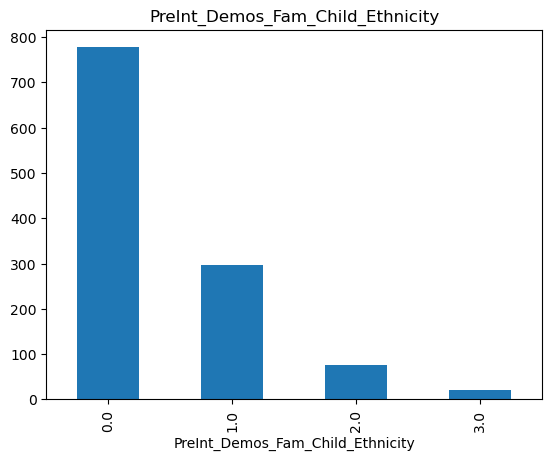

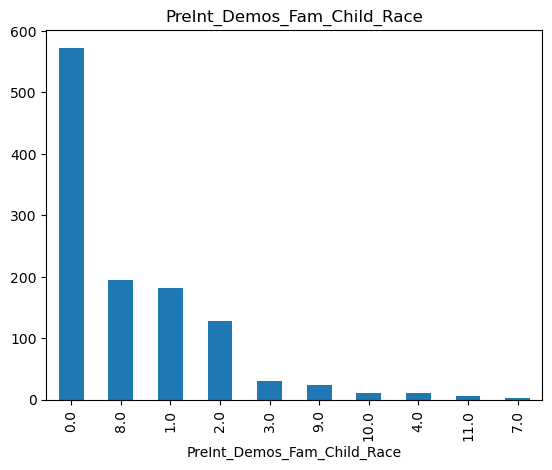

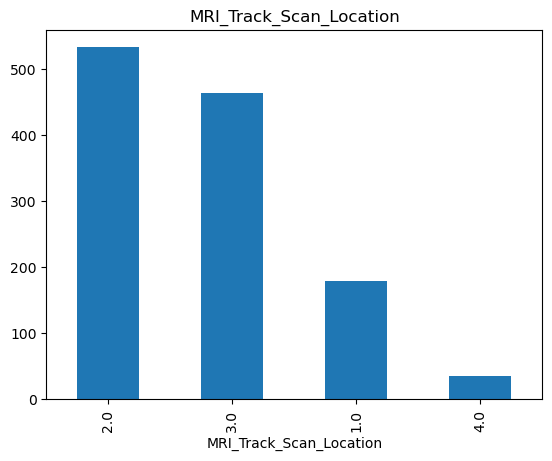

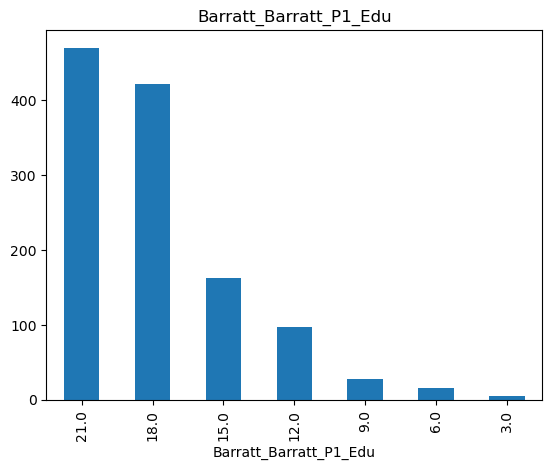

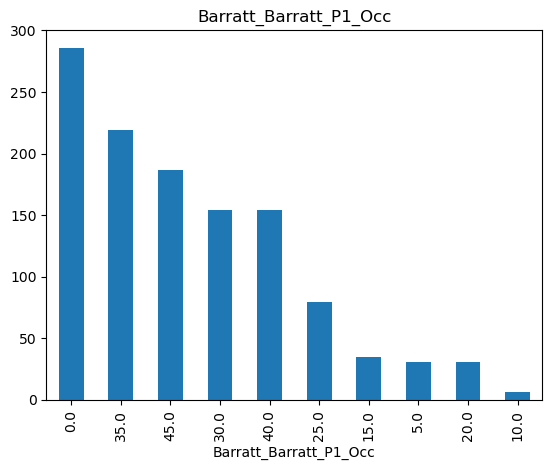

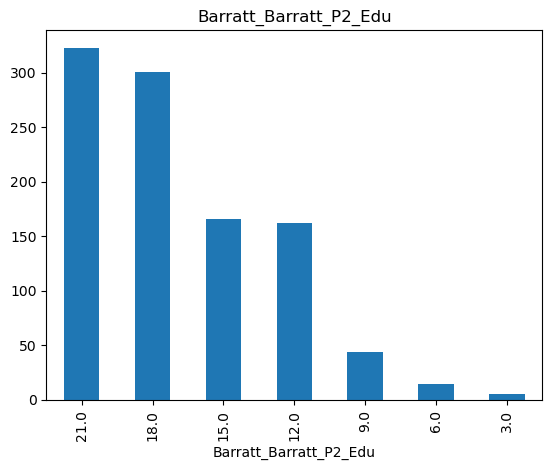

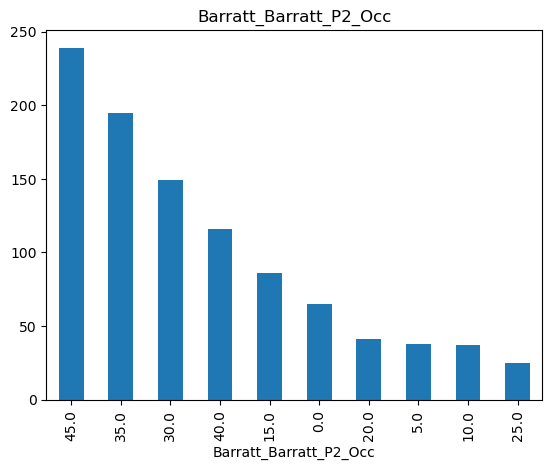

In [21]:
for col in df_cat.columns:
    plt.figure()
    df_cat[col].value_counts().plot(kind='bar', title= col)

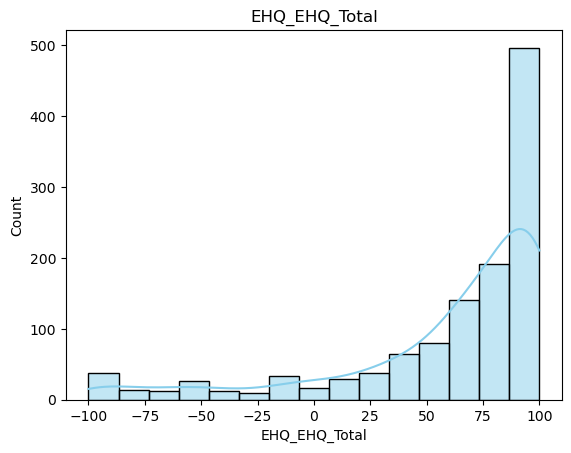

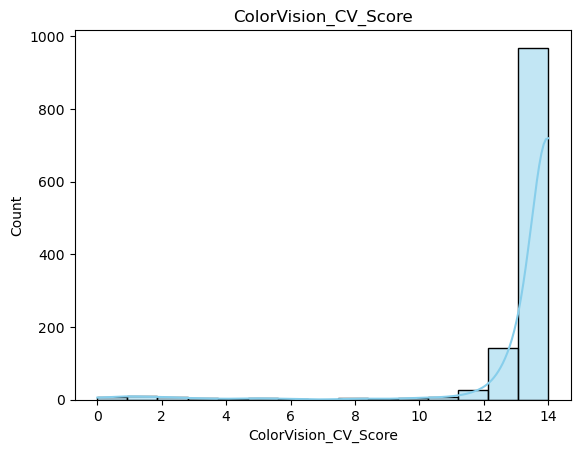

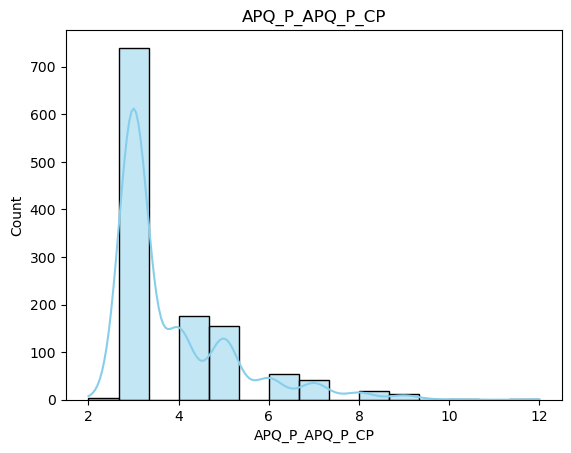

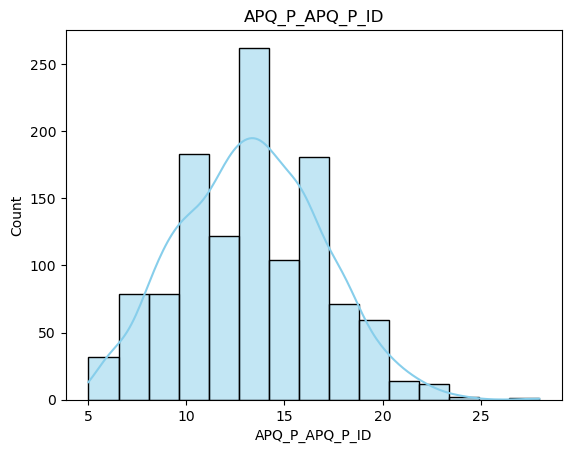

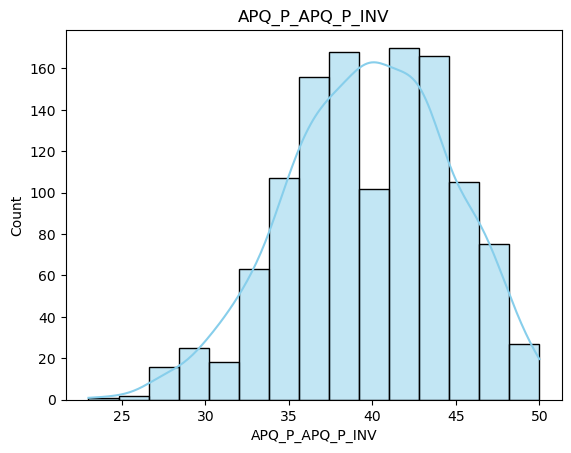

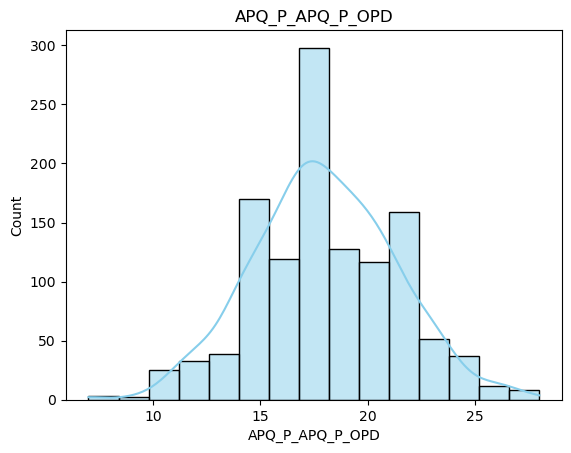

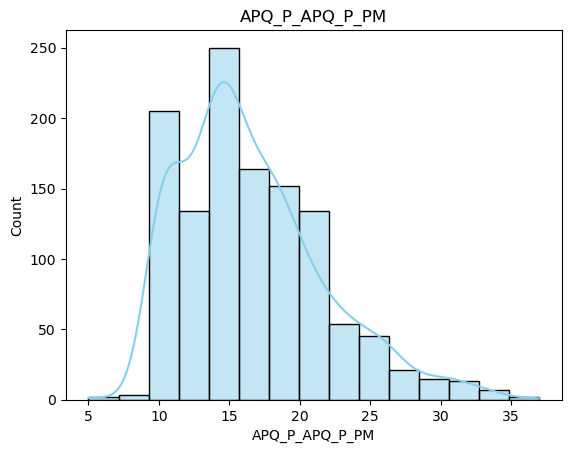

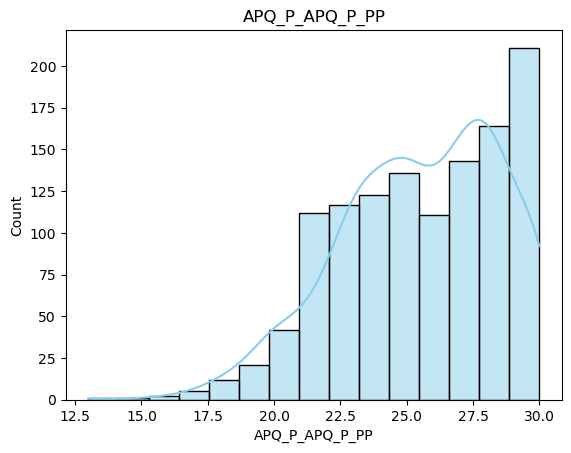

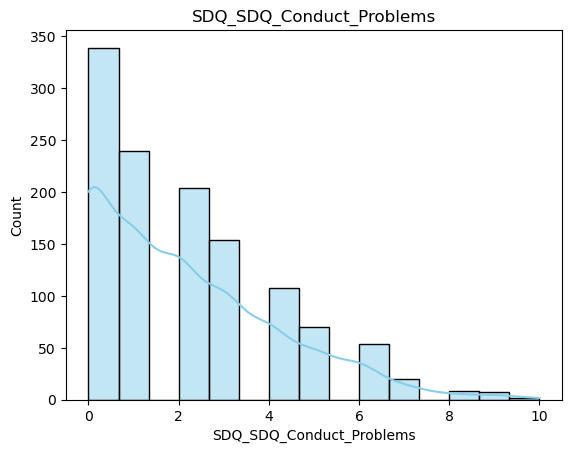

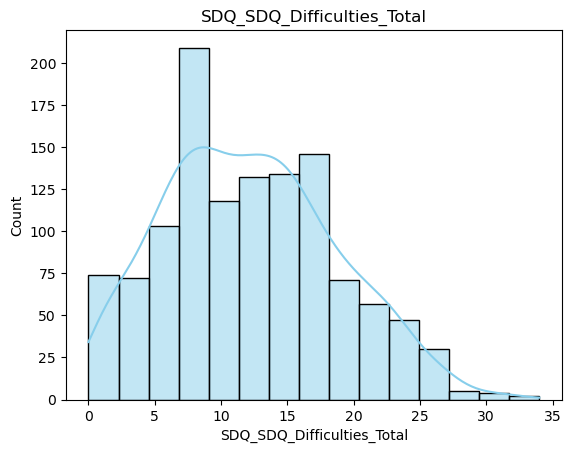

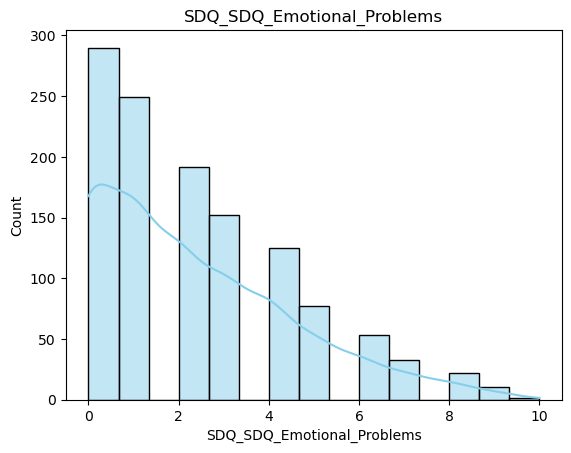

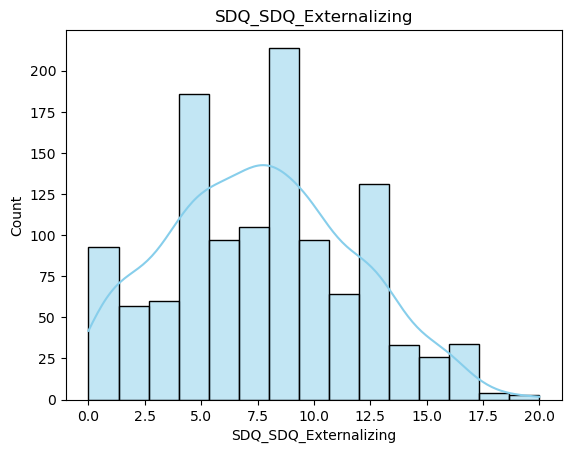

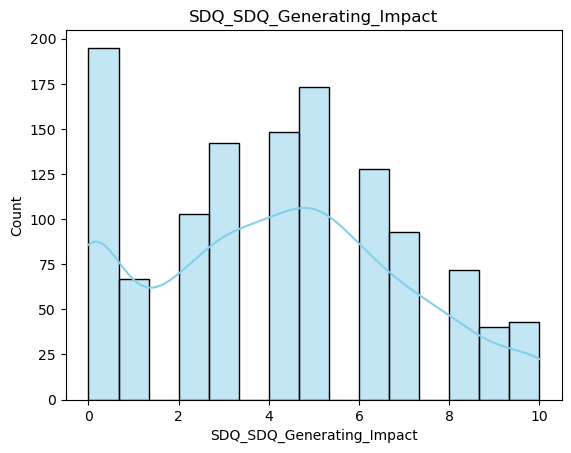

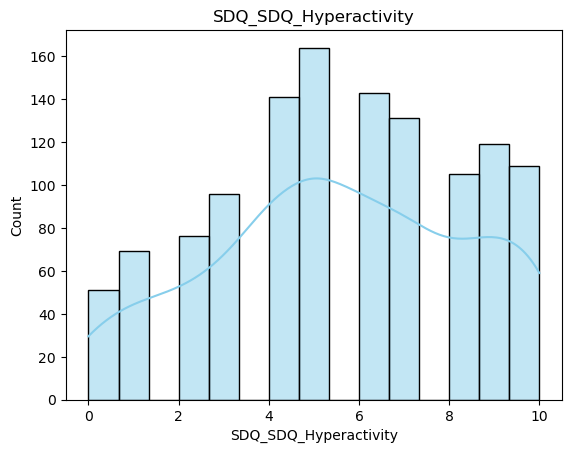

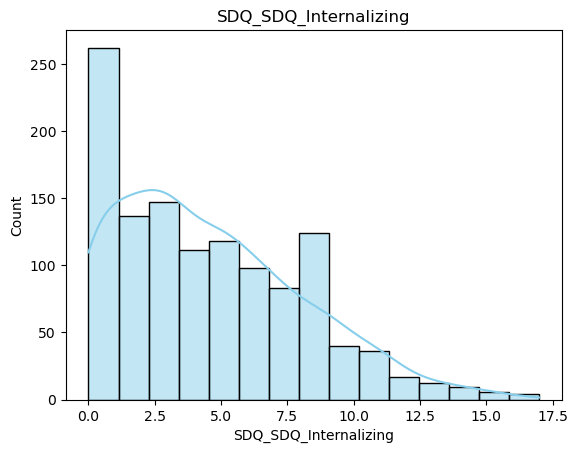

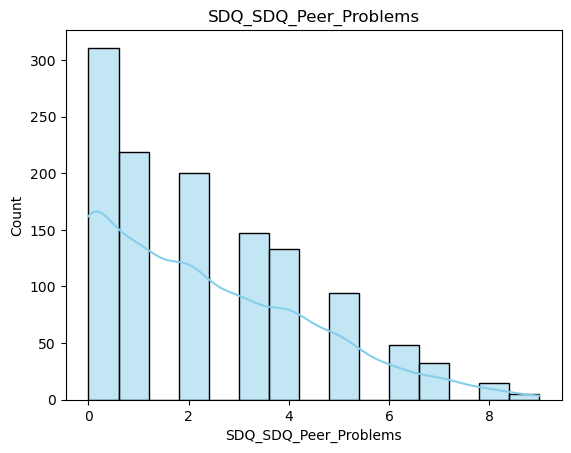

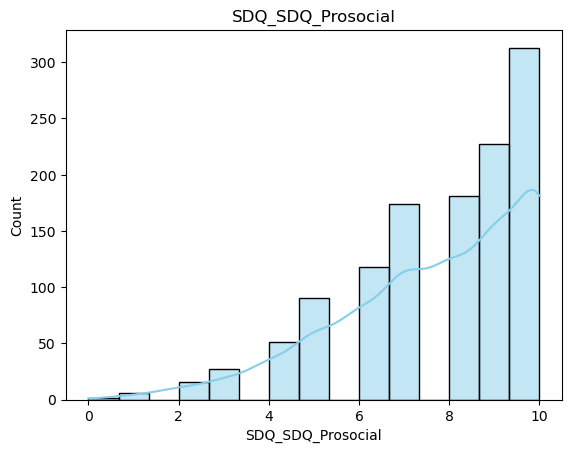

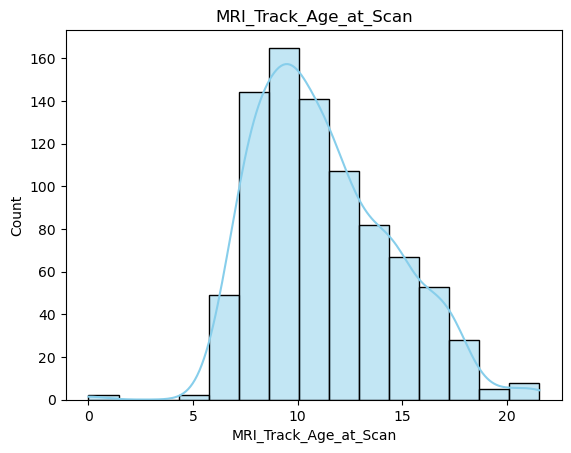

In [22]:
for col in df_quant:
    plt.figure()
    sns.histplot(df_quant[col], kde=True, bins=15, color='skyblue')
    plt.title(col)

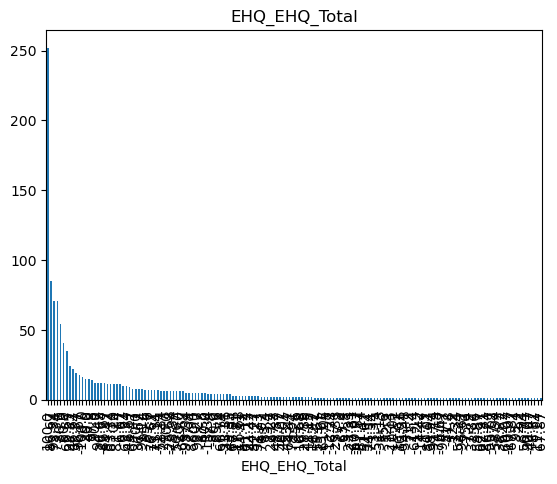

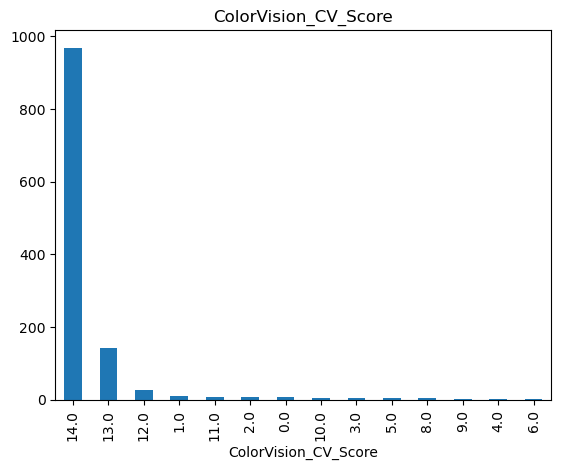

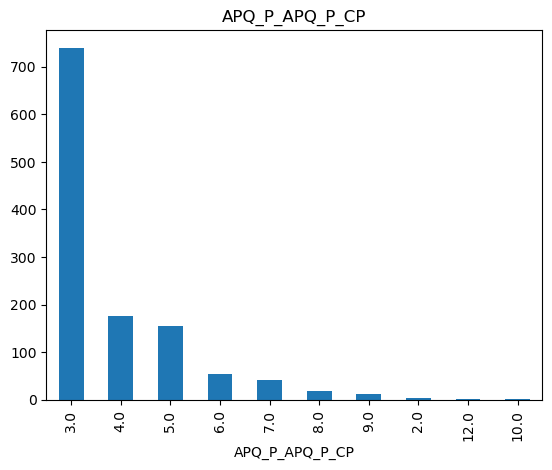

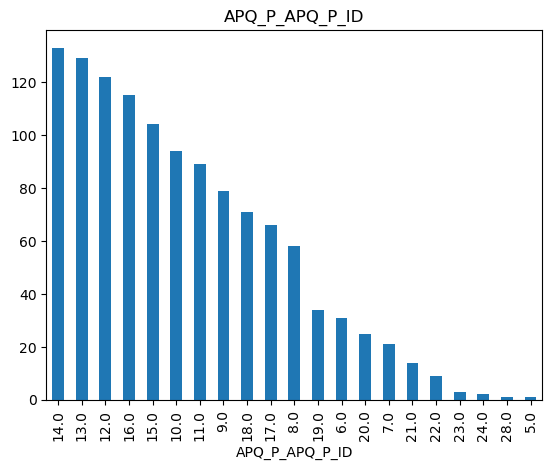

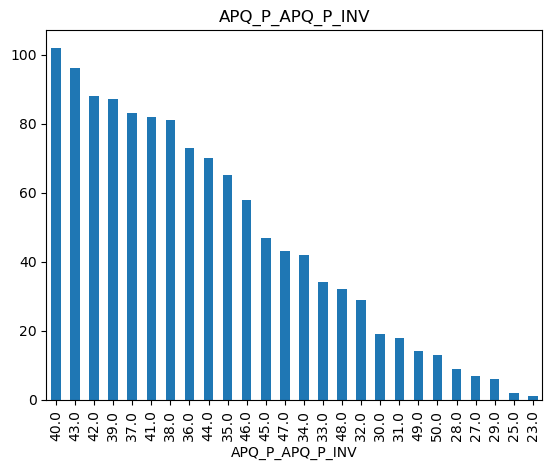

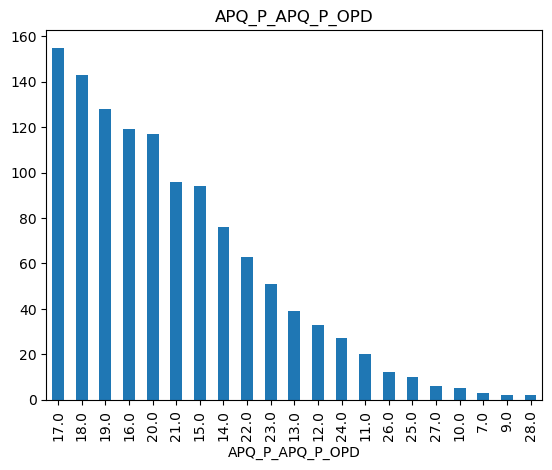

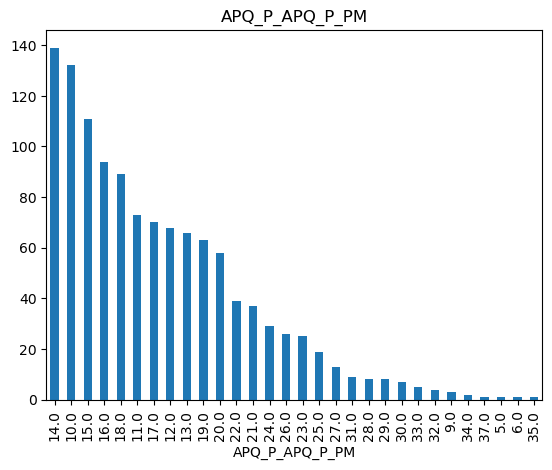

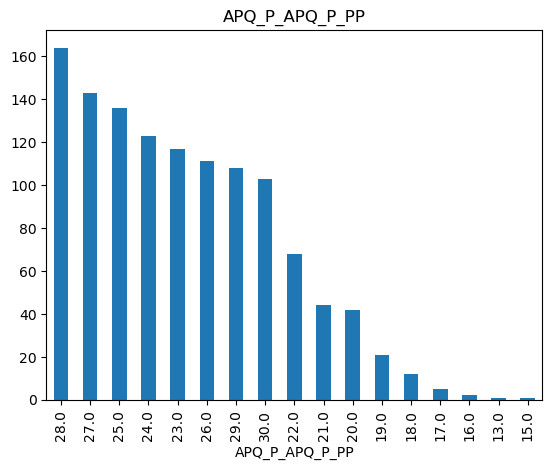

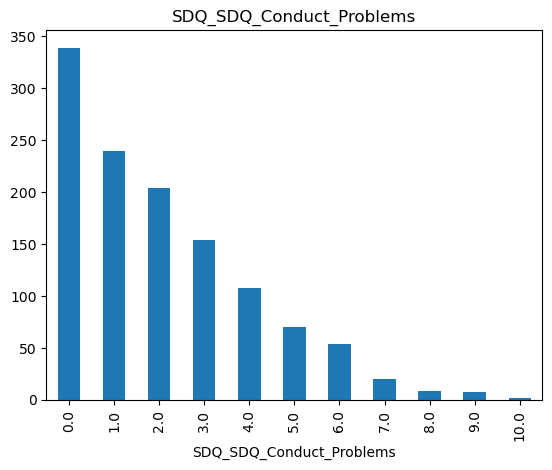

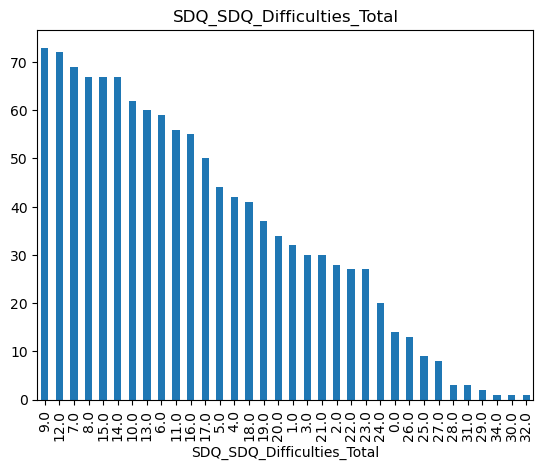

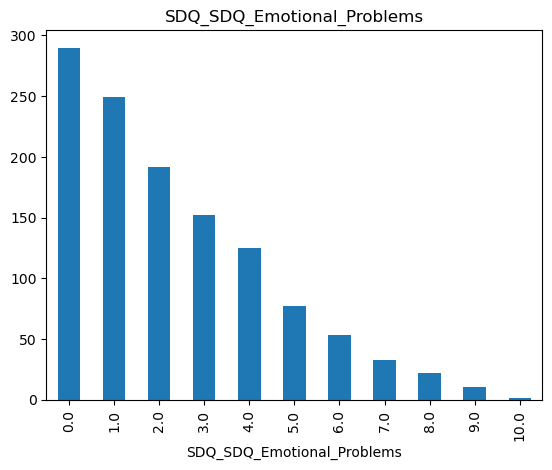

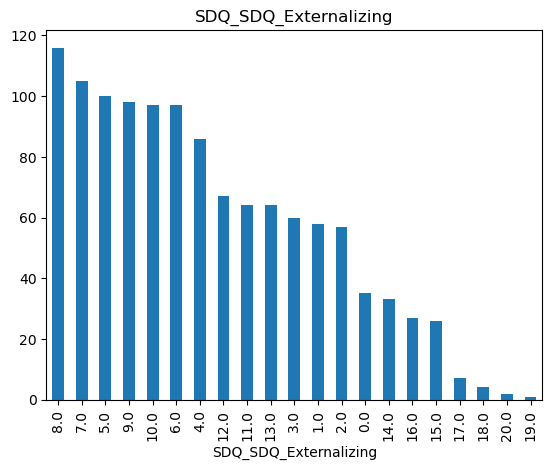

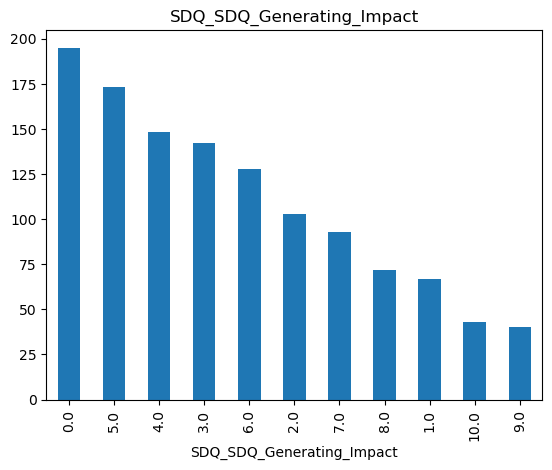

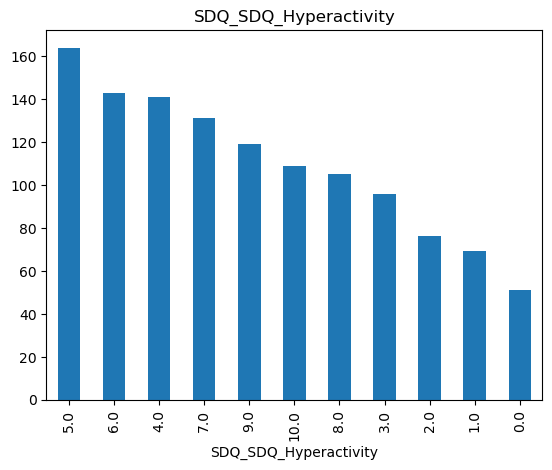

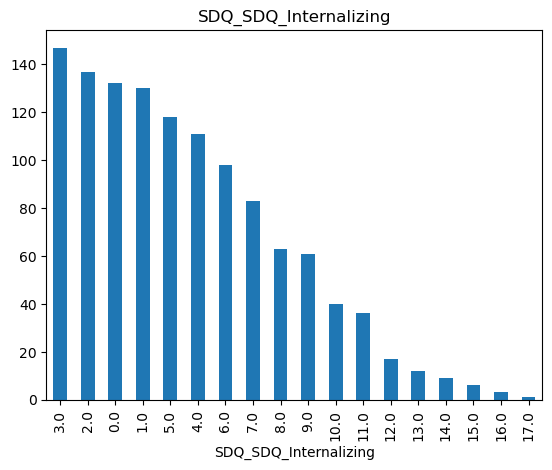

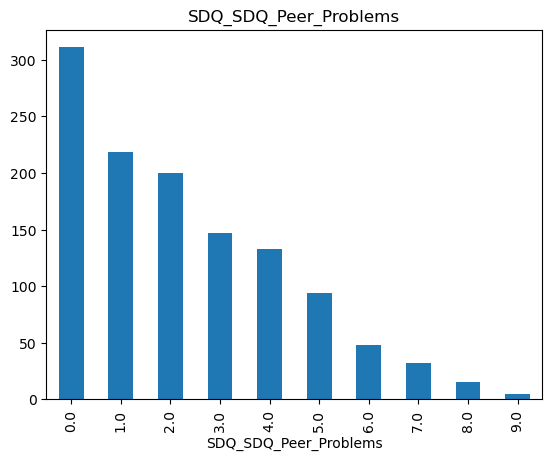

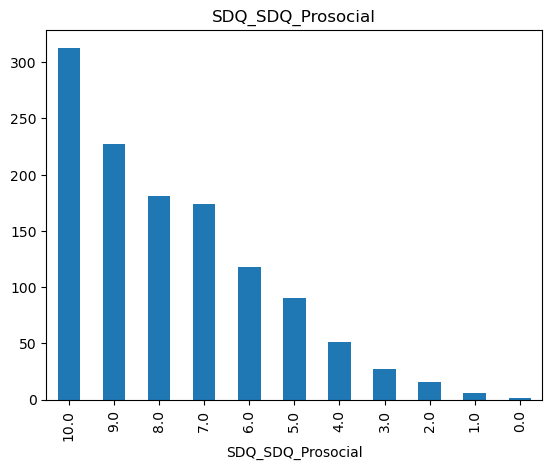

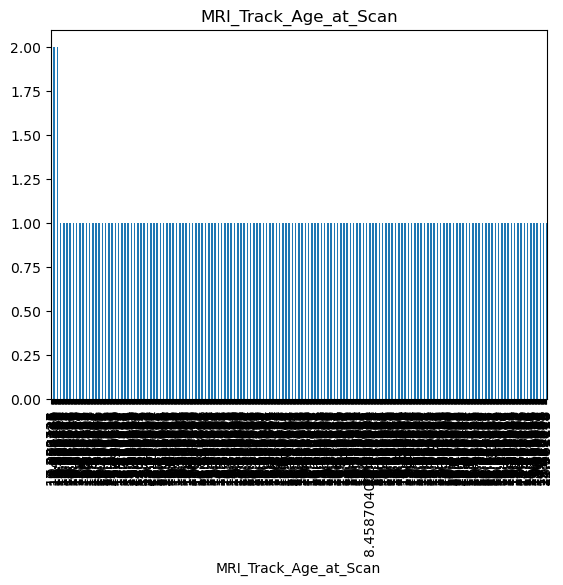

In [23]:
for col in df_quant.columns:
    plt.figure()
    df_quant[col].value_counts().plot(kind='bar', title= col)

# Handling missing categorical data

In [12]:
missing_percentage = df_cat.isnull().mean() * 100
for column, miss in missing_percentage.items():
    if miss < 5.0:
        # since the missing values are less than 5% of the data, the are considered to be missinf completely at randaom and therefore imputed by the mean
        mode_value = df_cat[column].mode(dropna=True)[0]
        df_cat[column].fillna(mode_value, inplace=True)
    else:
        print(column)

Barratt_Barratt_P2_Edu
Barratt_Barratt_P2_Occ


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4812\1314599904.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat[column].fillna(mode_value, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4812\1314599904.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [13]:
# data missing in Barratt_Barratt_P2_Occ is missing not at random (MNAR) and data missing in Barratt_Barratt_P2_Edu is missing at random (MAR)
(df_cat['Barratt_Barratt_P2_Edu'].isnull() & df_cat['Barratt_Barratt_P2_Occ'].isnull() ).mean()

np.float64(0.15169002473206925)

In [14]:
# if occupation is missing but education is available, impute the occupation with the mode occupation of the eduaction
mode_per_edu = df_cat.groupby('Barratt_Barratt_P2_Edu')['Barratt_Barratt_P2_Occ'].agg(lambda x: x.mode()[0])

def fill_occ(row):
    if pd.isna(row['Barratt_Barratt_P2_Occ']) and pd.notna(row['Barratt_Barratt_P2_Edu']):
        return mode_per_edu.get(row['Barratt_Barratt_P2_Edu'], row['Barratt_Barratt_P2_Occ'])
    return row['Barratt_Barratt_P2_Occ']

df_cat['Barratt_Barratt_P2_Occ'] = df_cat.apply(fill_occ, axis=1)

mode_per_edu = df_cat.groupby('Barratt_Barratt_P2_Occ')['Barratt_Barratt_P2_Edu'].agg(lambda x: x.mode()[0])

def fill_occ(row):
    if pd.isna(row['Barratt_Barratt_P2_Edu']) and pd.notna(row['Barratt_Barratt_P2_Occ']):
        return mode_per_edu.get(row['Barratt_Barratt_P2_Occ'], row['Barratt_Barratt_P2_Edu'])
    return row['Barratt_Barratt_P2_Edu']

df_cat['Barratt_Barratt_P2_Edu'] = df_cat.apply(fill_occ, axis=1)

# if both Barratt_Barratt_P2_Edu and Barratt_Barratt_P2_Occ are missing impute the edu with -3 and the occ with -5
both_missing = df_cat['Barratt_Barratt_P2_Edu'].isna() & df_cat['Barratt_Barratt_P2_Occ'].isna()

df_cat.loc[both_missing, 'Barratt_Barratt_P2_Edu'] = 0
df_cat.loc[both_missing, 'Barratt_Barratt_P2_Occ'] = -1

In [15]:
df_cat.isna().sum()

Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P1_Occ              0
Barratt_Barratt_P2_Edu              0
Barratt_Barratt_P2_Occ              0
dtype: int64

# Handling missing quantitative data

In [16]:
missing_percentage = df_quant.isnull().mean() * 100
for column, miss in missing_percentage.items():
    if miss < 5.0:
        median_value = df_quant[column].median(skipna=True)
        df_quant[column].fillna(median_value, inplace=True)
    else:
        print(column)

MRI_Track_Age_at_Scan


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4812\1342949909.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_quant[column].fillna(median_value, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4812\1342949909.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [17]:
missing_indices = df_quant[df_quant['MRI_Track_Age_at_Scan'].isnull()].index

shuffled_indices = np.random.permutation(missing_indices)

half = len(shuffled_indices) // 2
first_half = shuffled_indices[:half]
second_half = shuffled_indices[half:]

df_quant.loc[first_half, 'MRI_Track_Age_at_Scan'] = 9
df_quant.loc[second_half, 'MRI_Track_Age_at_Scan'] = 10

In [18]:
df_quant.isna().sum()

EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64

# Handling Outliers

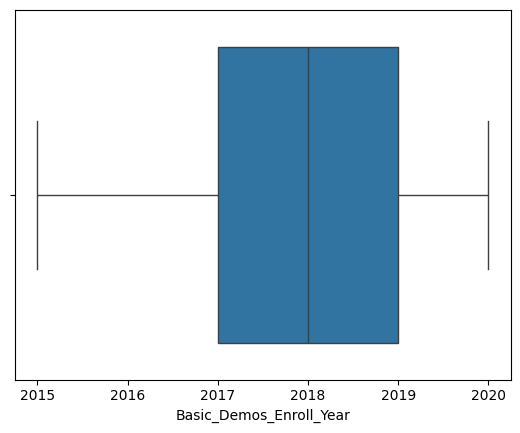

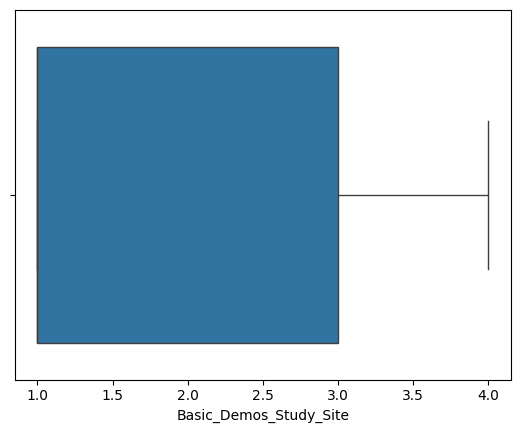

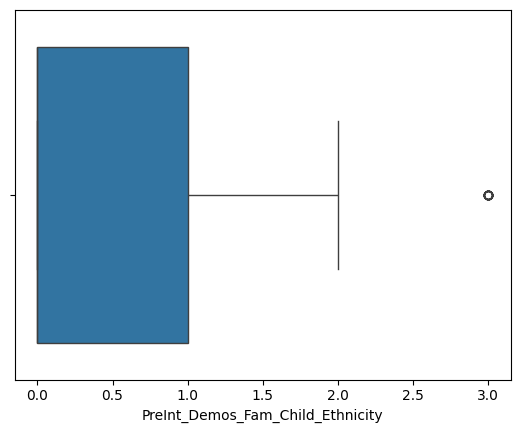

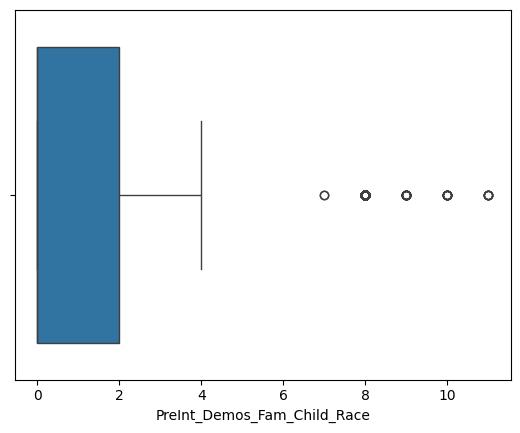

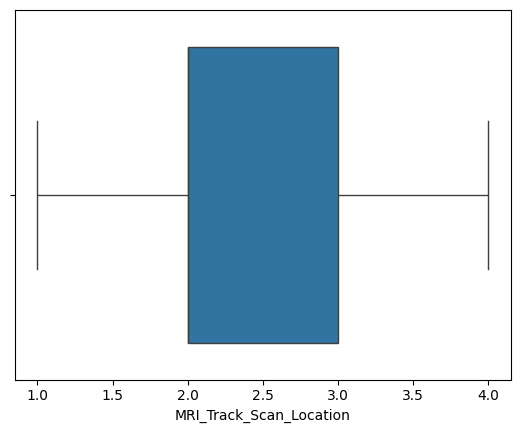

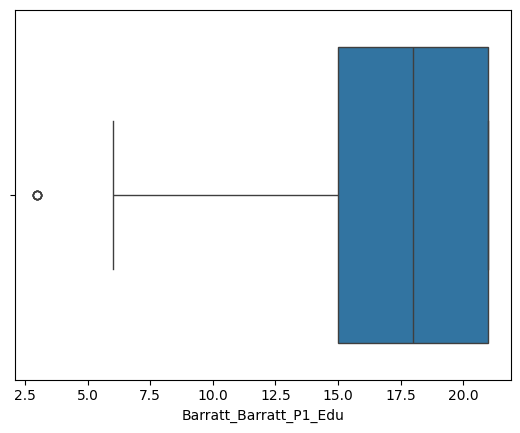

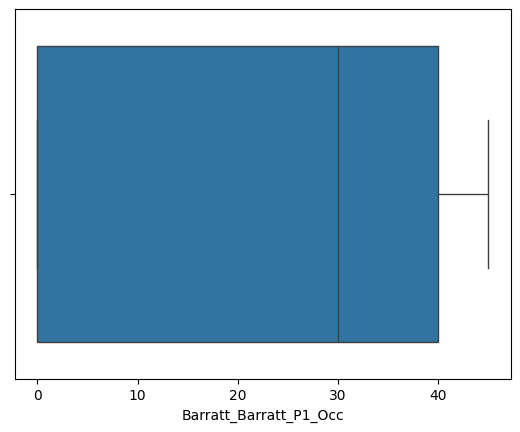

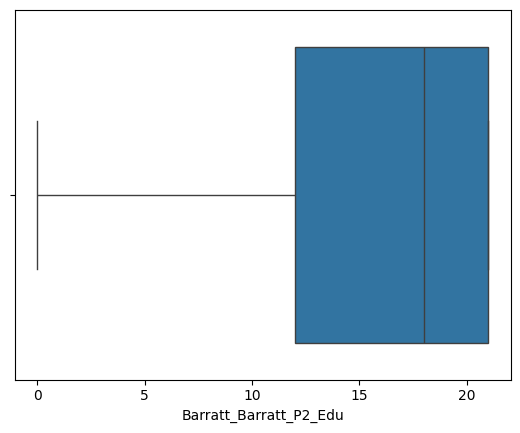

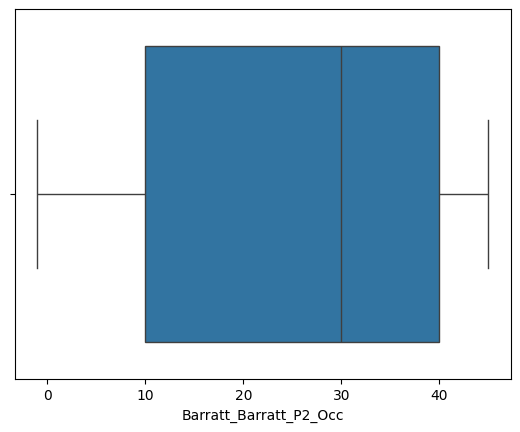

In [19]:
for col in df_cat.columns:
    plt.figure()
    sns.boxplot(data=df_cat, x=col)

Barratt_Barratt_P1_Edu
21.0    485
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64


<Axes: xlabel='Barratt_Barratt_P1_Edu'>

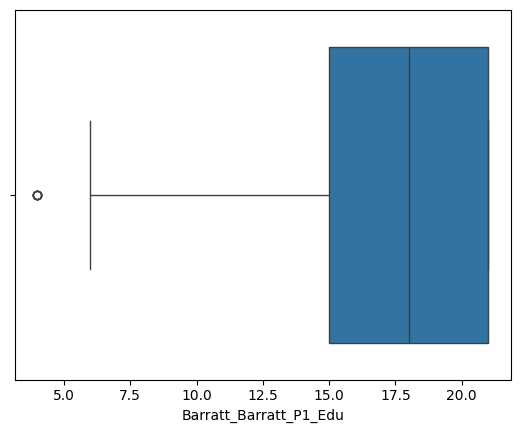

In [20]:
print (df_cat.Barratt_Barratt_P1_Edu.value_counts())
df_cat.loc[df_cat['Barratt_Barratt_P1_Edu'] < 4 , 'Barratt_Barratt_P1_Edu'] = 4
sns.boxplot(data=df_cat, x="Barratt_Barratt_P1_Edu")

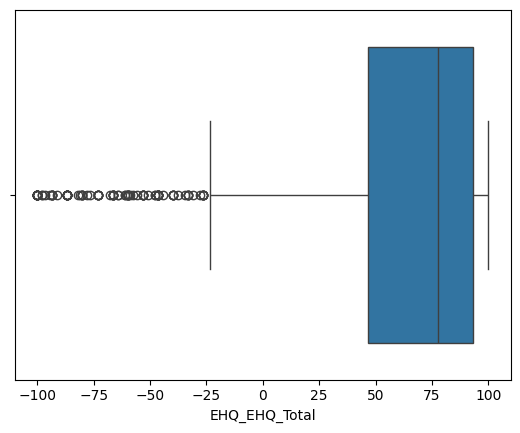

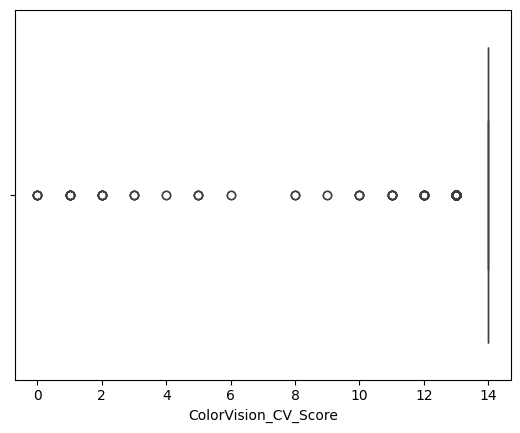

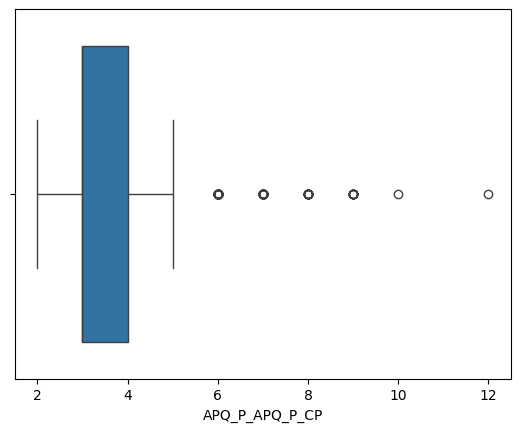

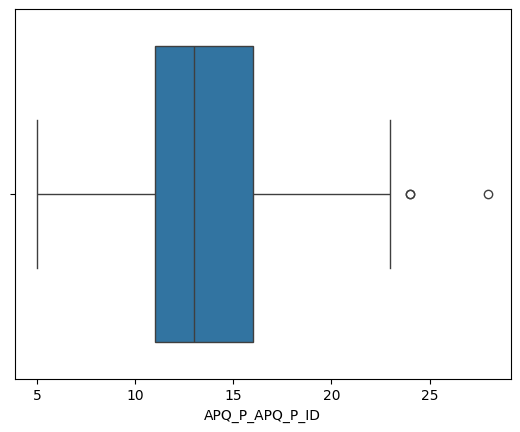

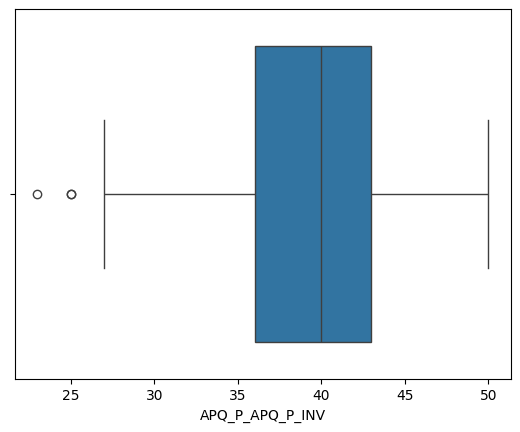

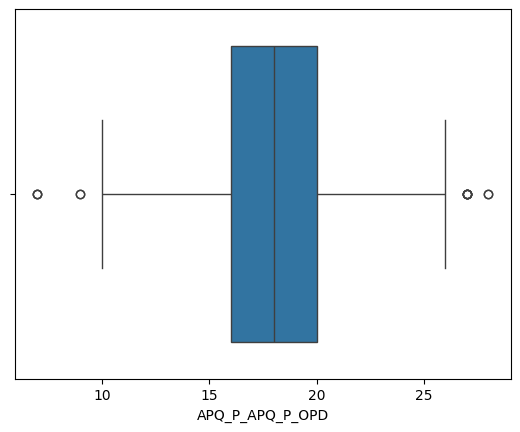

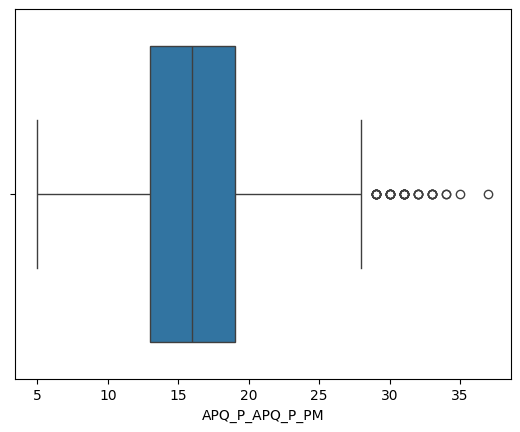

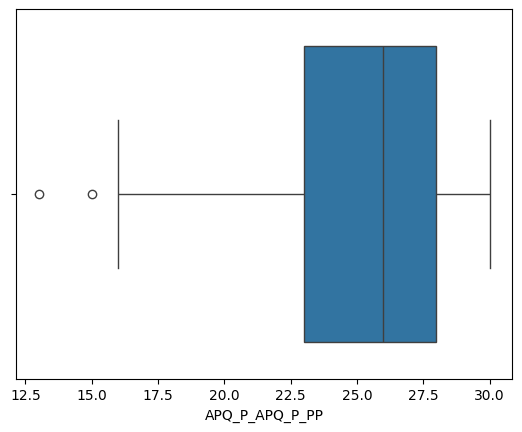

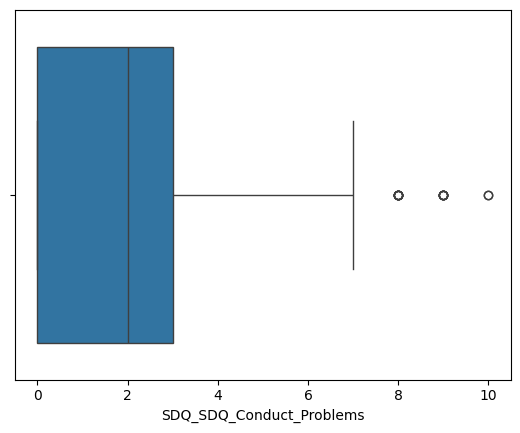

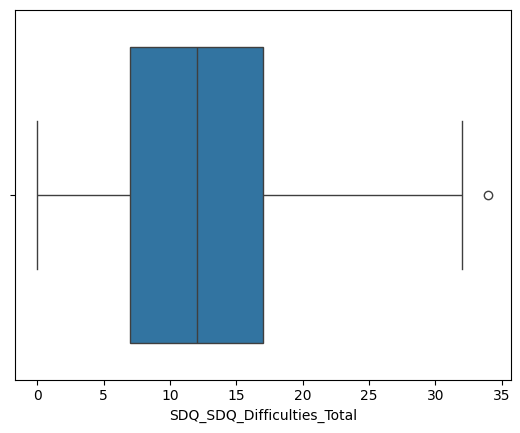

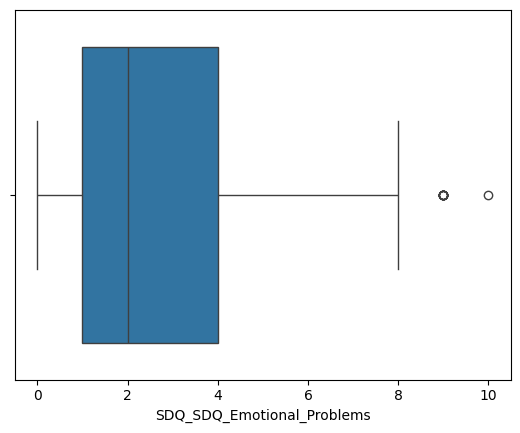

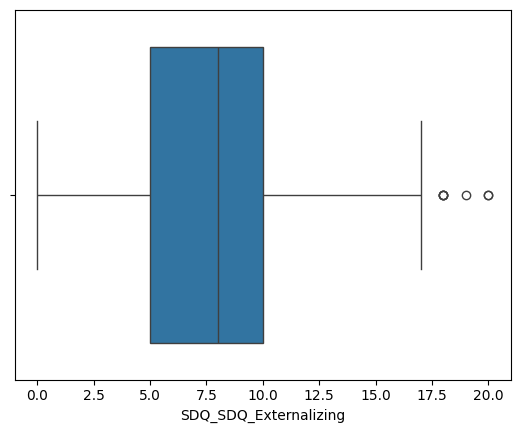

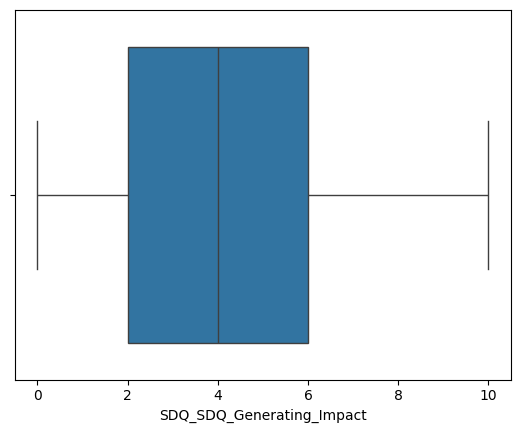

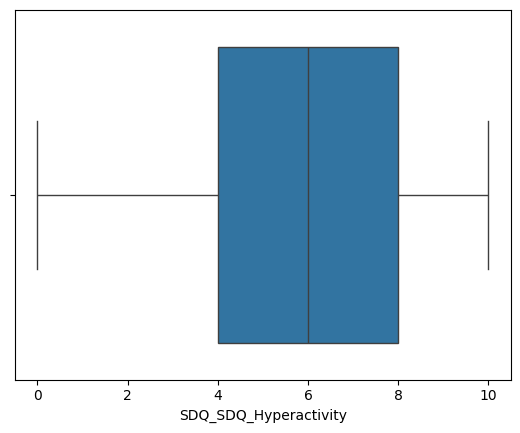

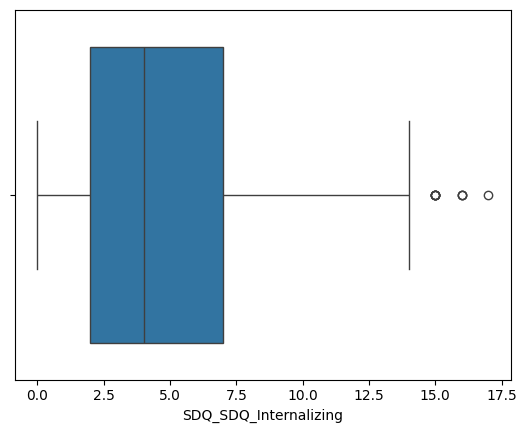

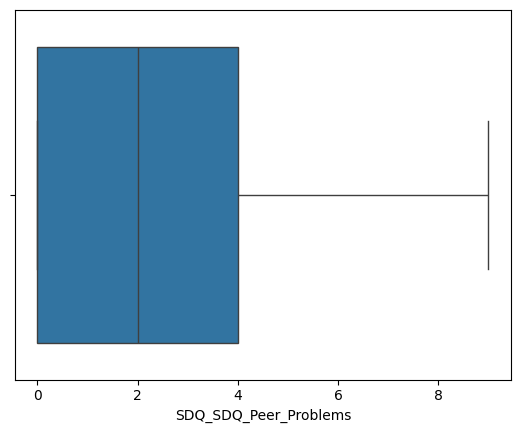

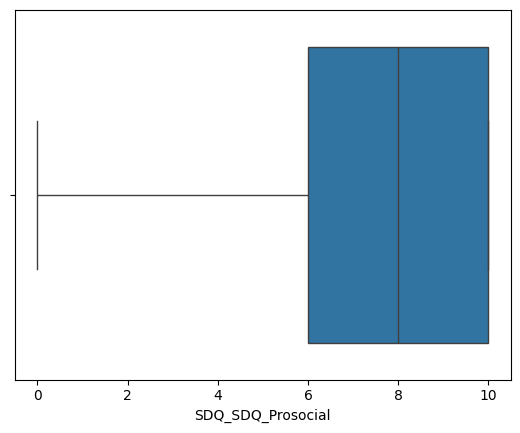

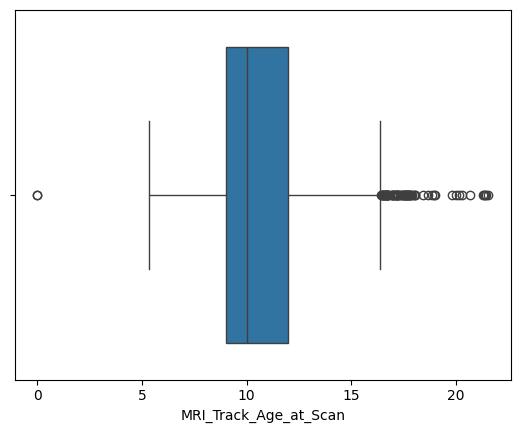

In [21]:
for col in df_quant.columns:
    plt.figure()
    sns.boxplot(data=df_quant, x=col)

## IQR-based Capping for Quantitative Data

In [22]:
for col in df_quant.columns:
    Q1 = df_quant[col].quantile(0.25)
    Q3 = df_quant[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR

    df_quant.loc[df_quant[col] < lower_cap, col] = lower_cap

    df_quant.loc[df_quant[col] > upper_cap, col] = upper_cap

In [23]:
df_cat.to_csv("cat_outlier.csv")

In [102]:
df_quant.to_csv("quant_outlier.csv")

# Scale the data Standard Scaler

In [24]:
scaler = StandardScaler()
df_cat_st = pd.DataFrame(scaler.fit_transform(df_cat), columns=df_cat.columns, index=df_cat.index)
df_quant_st = pd.DataFrame(scaler.fit_transform(df_quant), columns=df_quant.columns, index=df_quant.index)
df_connect_st = pd.DataFrame(scaler.fit_transform(df_connectcome), columns=df_connectcome.columns, index=df_connectcome.index)

# Deep Learning - FNN

In [25]:
#df_cat.drop(columns=['Basic_Demos_Enroll_Year','PreInt_Demos_Fam_Child_Ethnicity'],inplace = True)
X_part1 = df_connectcome
X_part2 = pd.merge(df_cat, df_quant, on = 'participant_id')
df = pd.merge(X_part2, X_part1, on = 'participant_id')
X_part1 = X_part1.values
X_part2 = X_part2.values


y_dict = {
    'adhd_output': df_solutions['ADHD_Outcome'].values,
    'gender_output': df_solutions['Sex_F'].values
}

In [26]:
y_combined =  y_dict['adhd_output'].astype(str) + "_" + y_dict['gender_output'].astype(str)


#Train/Test Split
X1_train, X1_test, X2_train, X2_test, y_train_adhd, y_test_adhd, y_train_gender, y_test_gender = train_test_split(
    X_part1, X_part2, y_dict['adhd_output'], y_dict['gender_output'], test_size=0.3,stratify=y_combined,shuffle=True
)

y_train = np.column_stack((y_train_adhd, y_train_gender))
y_test = np.column_stack((y_test_adhd, y_test_gender))


def f1_score(y_true, y_pred):
    # Ensure both y_true and y_pred are of type float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)  # Round the predictions to 0 or 1
    y_pred = tf.cast(y_pred, tf.float32)  # Ensure y_pred is also float32

    true_positives = K.sum(y_true * y_pred)
    false_positives = K.sum((1 - y_true) * y_pred)
    false_negatives = K.sum(y_true * (1 - y_pred))
    
    precision = true_positives / (true_positives + false_positives + K.epsilon())
    recall = true_positives / (true_positives + false_negatives + K.epsilon())
    
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1


def encode_features(X_train_part1, X_test_part1, encoding_dim, epochs=50, batch_size=32):
    input_dim = X_train_part1.shape[1]
    
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu',kernel_regularizer=regularizers.l2(1e-5))(input_layer)
    encoded = Dropout(0.2)(encoded) 
    decoded = Dense(input_dim, activation='linear')(encoded)


    autoencoder = Model(inputs=input_layer, outputs=decoded)
    encoder = Model(inputs=input_layer, outputs=encoded)

    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X_train_part1, X_train_part1, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=1)

    X_train_encoded = encoder.predict(X_train_part1)
    X_test_encoded = encoder.predict(X_test_part1)
    
    return X_train_encoded, X_test_encoded


# Step 2: Build neural network model
def build_nn(input_dim):
    input_layer = Input(shape=(input_dim,))
    hidden = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_layer)
    hidden = Dropout(0.5)(hidden) 
    hidden = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_layer)
    hidden = Dropout(0.5)(hidden) 
    adhd_output = Dense(1, activation='sigmoid', name='adhd_output')(hidden)
    gender_output = Dense(1, activation='sigmoid', name='gender_output')(hidden)

    model = Model(inputs=input_layer, outputs=[adhd_output, gender_output])
    model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001, weight_decay=1e-5),
        loss={
            'gender_output': 'binary_crossentropy',
            'adhd_output': 'binary_crossentropy'
        },
        loss_weights={
           'adhd_output': 1.0, 
           'gender_output': 3.0
        },
        metrics={
            'gender_output': ['accuracy', f1_score, AUC()],
            'adhd_output': ['accuracy', f1_score,  AUC()]
        }
    )
    return model


encoding_dims = [1000,1100,1150,1200]
best_score = -np.inf
best_model = None
best_params = {}

for encoding_dim in encoding_dims:
    # Step A: Apply autoencoder
    X1_train_encoded, X1_test_encoded = encode_features(X1_train, X1_test, encoding_dim)

    # Step B: Combine with X_part2
    X_train_combined = np.concatenate([X1_train_encoded, X2_train], axis=1)
    X_test_combined = np.concatenate([X1_test_encoded, X2_test], axis=1)

    # Step C: Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_combined)
    X_test_scaled = scaler.transform(X_test_combined)
    
    y_train_df = pd.DataFrame(y_train, columns=['ADHD_Outcome', 'Sex_F'])
    y_combined = y_train_df['ADHD_Outcome'].astype(str) + "_" + y_train_df['Sex_F'].astype(str)

    # Apply SMOTE to features and combined target
    adasyn = ADASYN()
    X_res, y_combined_res = adasyn.fit_resample(X_train_scaled, y_combined)
    
    # Split the combined target back into separate columns
    y_split = y_combined_res.str.split("_", expand=True)
    y_res = pd.DataFrame({
        'ADHD_Outcome': y_split[0].astype(int),
        'Sex_F': y_split[1].astype(int) })
    y_array = y_res.to_numpy()

    # Step D: Train model
    model = build_nn(input_dim=X_res.shape[1])
    model.fit(X_res, [y_array[:, 0], y_array[:, 1]],
    epochs=30,
    batch_size=32,
    verbose=1)

    # Step E: Evaluate
    results = model.evaluate(X_test_scaled, [y_test[:, 0], y_test[:, 1]], verbose=1)

    # Unpack the results
    total_loss, adhd_loss, gender_loss, adhd_acc, adhd_f1, adhd_auc, gender_acc, gender_f1, gender_auc = results

    avg_score = 0.5 * adhd_acc + 0.5 * gender_acc

    # Step F: Get predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Step G: Calculate the F1-score for each output (ADHD and Gender)
    f1_adhd = f1_score(y_test[:, 0], tf.cast(y_pred[0] > 0.5, tf.float32))
    f1_gender = f1_score(y_test[:, 1], tf.cast(y_pred[1] > 0.5, tf.float32))

    # Step H: Print the results
    print(f"Encoding dim {encoding_dim} — ADHD acc: {adhd_acc:.3f}, Gender acc: {gender_acc:.3f}")
    print(f"F1-Score for ADHD: {f1_adhd:.3f}, F1-Score for Gender: {f1_gender:.3f}")
    print(f"Avg score: {avg_score:.3f}")

    avg_f1_score = 0.5 * f1_adhd + 0.5 * f1_gender

    # For multi-output, we get predictions for both outputs
    adhd_preds = y_pred[0]  
    gender_preds = y_pred[1]  

    # Convert the probabilities to binary labels
    adhd_preds_binary = (adhd_preds > 0.5).astype(int)
    gender_preds_binary = (gender_preds > 0.5).astype(int)

    # Get true values for both outputs
    adhd_true = y_test[:, 0]
    gender_true = y_test[:, 1]

    # Generate classification reports
    adhd_report = classification_report(adhd_true, adhd_preds_binary, target_names=["Non-ADHD", "ADHD"])
    gender_report = classification_report(gender_true, gender_preds_binary, target_names=["Male", "Female"])
    cm_adhd = confusion_matrix(adhd_true, adhd_preds_binary)
    cm_gender = confusion_matrix(gender_true, gender_preds_binary)

    if avg_f1_score > best_score:
        best_score = avg_f1_score
        best_model = model
        best_params = {
            'encoding_dim': encoding_dim,
            'f1_adhd': f1_adhd,
            'f1_gender': f1_gender,
            'avg_f1_score': avg_f1_score,
            'adhd_report': adhd_report,
            'gender_report':gender_report,
            'cm_adhd':cm_adhd,
            'cm_gender':cm_gender
        }

print("Best encoding_dim:", best_params)
print("Best score:", best_score)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - loss: 0.0693
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.0476
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.0395
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0360
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - loss: 0.0341
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - loss: 0.0341
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0336
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0321
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0318
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - loss: 0.0315
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0314
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0315
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0310
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - loss: 0.0307
Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - lo

In [27]:
print(best_params['adhd_report'])
print(best_params['gender_report'])

              precision    recall  f1-score   support

    Non-ADHD       0.60      0.70      0.64       115
        ADHD       0.85      0.78      0.81       249

    accuracy                           0.76       364
   macro avg       0.72      0.74      0.73       364
weighted avg       0.77      0.76      0.76       364

              precision    recall  f1-score   support

        Male       0.75      0.69      0.71       239
      Female       0.48      0.55      0.51       125

    accuracy                           0.64       364
   macro avg       0.61      0.62      0.61       364
weighted avg       0.65      0.64      0.65       364



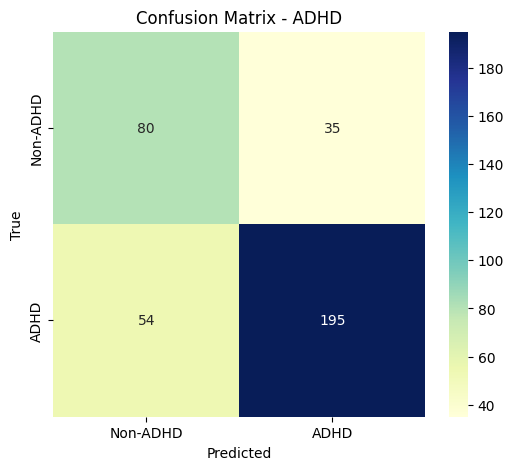

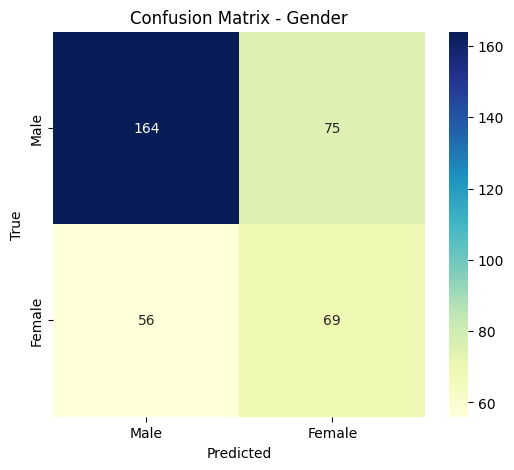

In [28]:
plt.figure(figsize=(6, 5))
sns.heatmap(best_params['cm_adhd'], annot=True, fmt='d', cmap='YlGnBu', xticklabels=["Non-ADHD", "ADHD"], yticklabels=["Non-ADHD", "ADHD"])
plt.title("Confusion Matrix - ADHD")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Gender Confusion Matrix
cm_gender = confusion_matrix(gender_true, gender_preds_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(best_params['cm_gender'], annot=True, fmt='d', cmap='YlGnBu', xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.title("Confusion Matrix - Gender")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()